# _Keras Regression Code Along Project_

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data! 

The goal of this project is to predict the price of a house given certain features. 

## 1. The Data

We will be using a [House Sale](https://www.kaggle.com/harlfoxem/housesalesprediction) dataset from Kaggle which consist of house sales in King Country between May 2014 and May 2015:

<ins>**Feature Columns**:</ins>
    
* `id` - Unique ID for each home sold
* `date` - Date of the home sale
* `price` - Price of each home sold
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* `sqft_living` - Square footage of the apartments interior living space
* `sqft_lot` - Square footage of the land space
* `floors` - Number of floors
* `waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not
* `view` - An index from 0 to 4 of how good the view of the property was
* `condition` - An index from 1 to 5 on the condition of the apartment,
* `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* `sqft_above` - The square footage of the interior housing space that is above ground level
* `sqft_basement` - The square footage of the interior housing space that is below ground level
* `yr_built` - The year the house was initially built
* `yr_renovated` - The year of the house’s last renovation
* `zipcode` - What zipcode area the house is in
* `lat` - Lattitude
* `long` - Longitude
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# I. Exploratory Data Analysis

First, it is helpful to know if there are any missing data points...

In [6]:
# As we can see, there are none
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()
# Note: `.transpose()` to to get a better format of describe method

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


A good startin gpoint for continous data is to do a _distribution plot for the label_ in question (i.e. in this case, price)

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

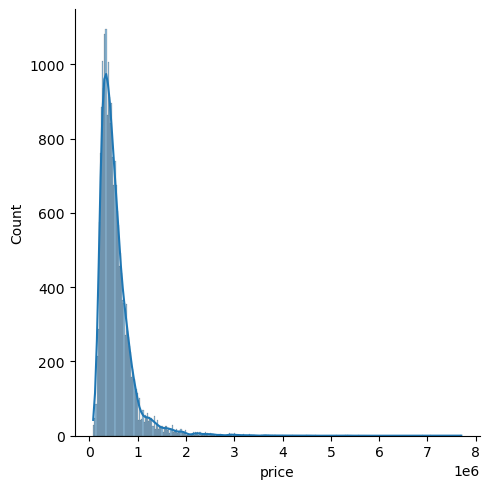

In [21]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], kde=True)

# Observation:
#    - Seems most of the houses fall between $0 and $1M 
#    - There are outliers worth upwards of $8M which we could later drop for more 
#         accurate and realistic model predictions

We can continue EDA on catigorical features such as bedrooms.

<ins>Observations</ins>:  
A majority of the houses have beterrn $2$ and $5$ bedrooms. Again we see outliers of houses with $11$ and $33$ bedrooms (I would assume thoses houses with outlier bedroom amounts are also outliers in price, but we shall see). 

<Axes: xlabel='bedrooms', ylabel='count'>

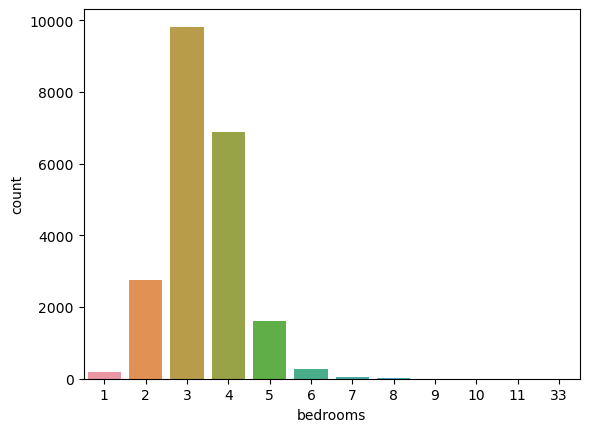

In [26]:
sns.countplot(df, x="bedrooms")

Another good method for EDA is to compare the label to a feature in which you assume would have a high correlation, like squarefootage (square footage of the house is important when buying a house, but I also value the amount of land on the plot, so I am curious if prices reflect that as well).

Instead of guessing which features would correlate to the price, we can just run the followin gto get the correlations...

In [40]:
df.corr(numeric_only=True).price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

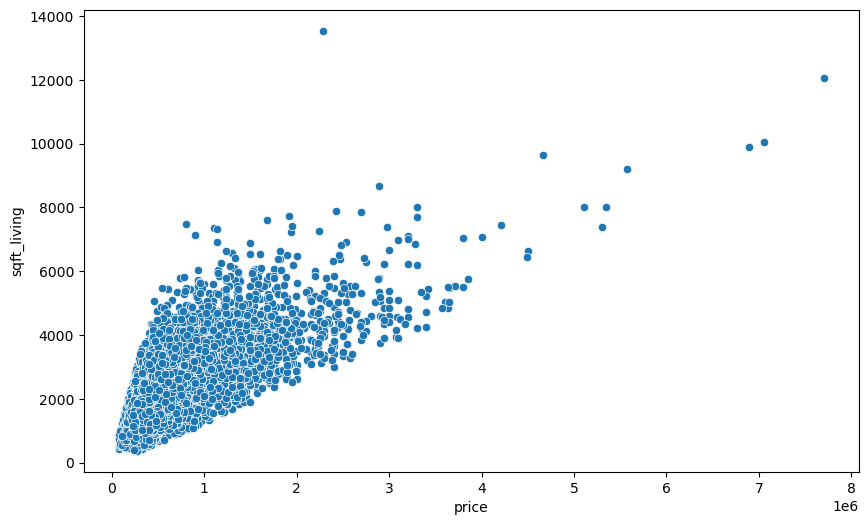

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

# Observations:
#    - There def seem sot be a correlation between size of house and price
#    - I spot an outlier, a house with the most sqr footage being priced at $2-3M

<Axes: xlabel='price', ylabel='sqft_lot'>

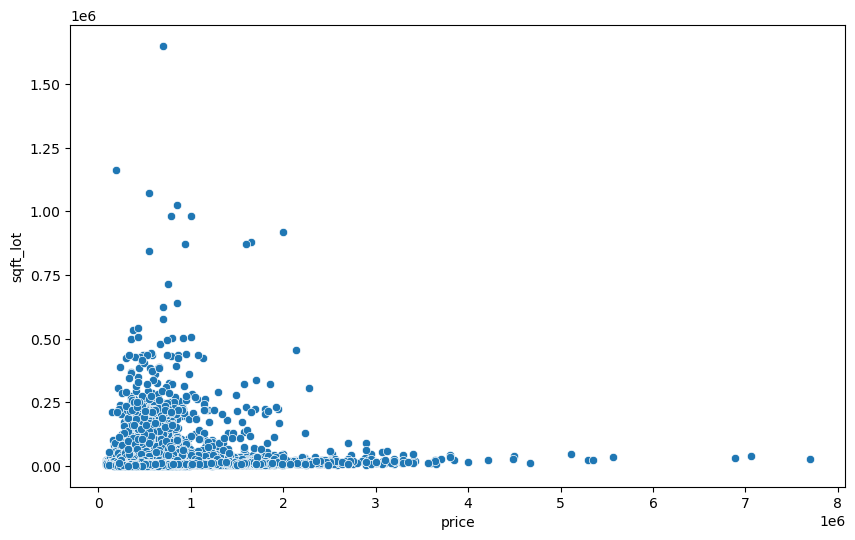

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_lot',data=df)

# Observations:
#    - The correaltion here is not as strong, if there is any at all, as teh previous squarefootage feature
#    - All the houses with the most land are priced between $1-2M whereas th emost expensive houses have very little land
#         - good new for me when i go house shopping
#    - I assume house location is more important than land, as the more land you have the more remote the house is. 

As we saw from calling the `.corr()` method, `bathrooms` has a high correlation to price (shockingly, it seems it has a higher corr than number of bedrooms). So we can explore the distrobution of those against price.

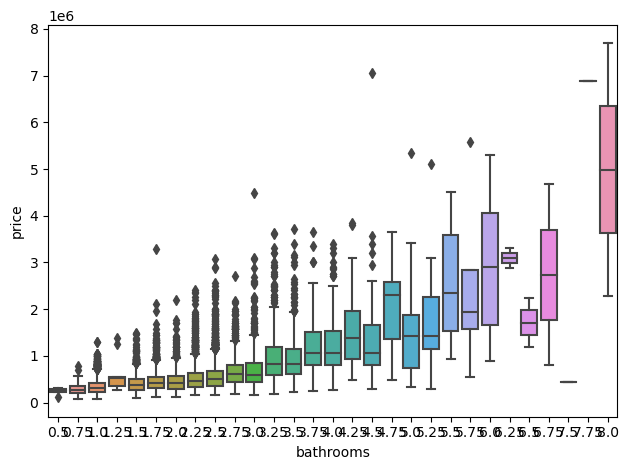

In [45]:
sns.boxplot(x='bathrooms',y='price',data=df)

# Observations: 
#    - The range of distros widens as the num of bathrooms increases, futher emphasizing the correlation

<Axes: xlabel='bedrooms', ylabel='price'>

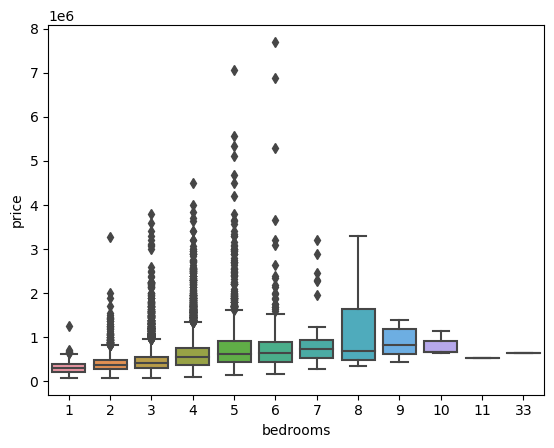

In [41]:
sns.boxplot(x='bedrooms',y='price',data=df)

# Observations: 
#    - We can see a huge distribution of price for 2-7 beds, similar to what we saw in the countplot previously. 

### i. Geographical Properties

This dataframe has longitude and lattitude features. I wonder the corr, so let's explore...

<Axes: xlabel='price', ylabel='long'>

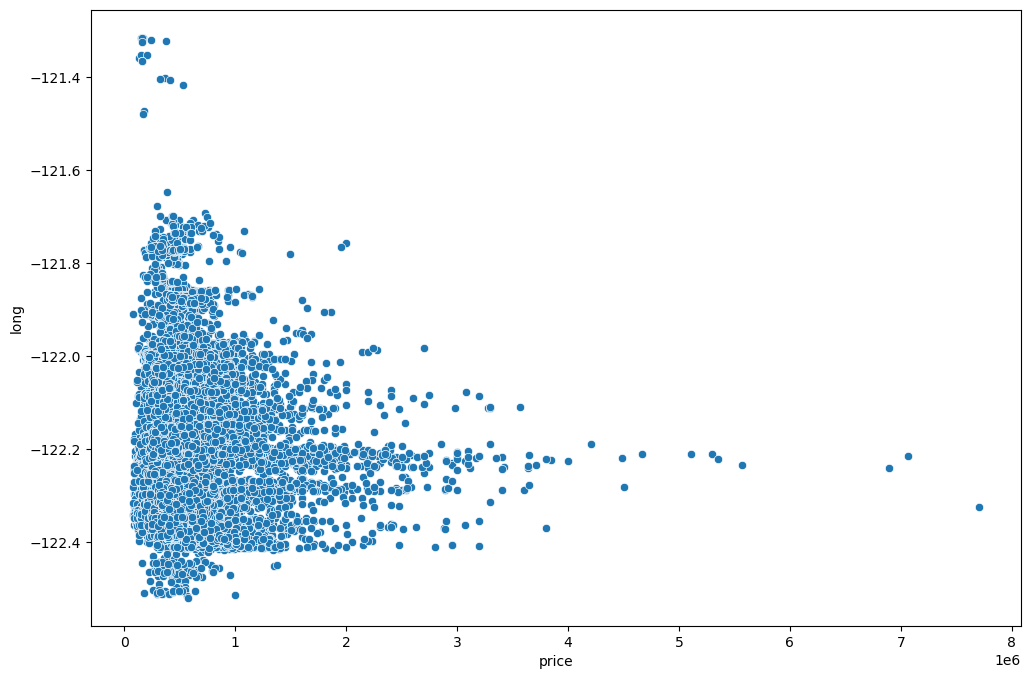

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

# Observations:
#    - There does seem to be a price differentiation depending on longitude
#    - around long=-122.2 is where the expensive houses are
#         - maybe ther lies a wealthy neighborhood on that long. 

<Axes: xlabel='price', ylabel='lat'>

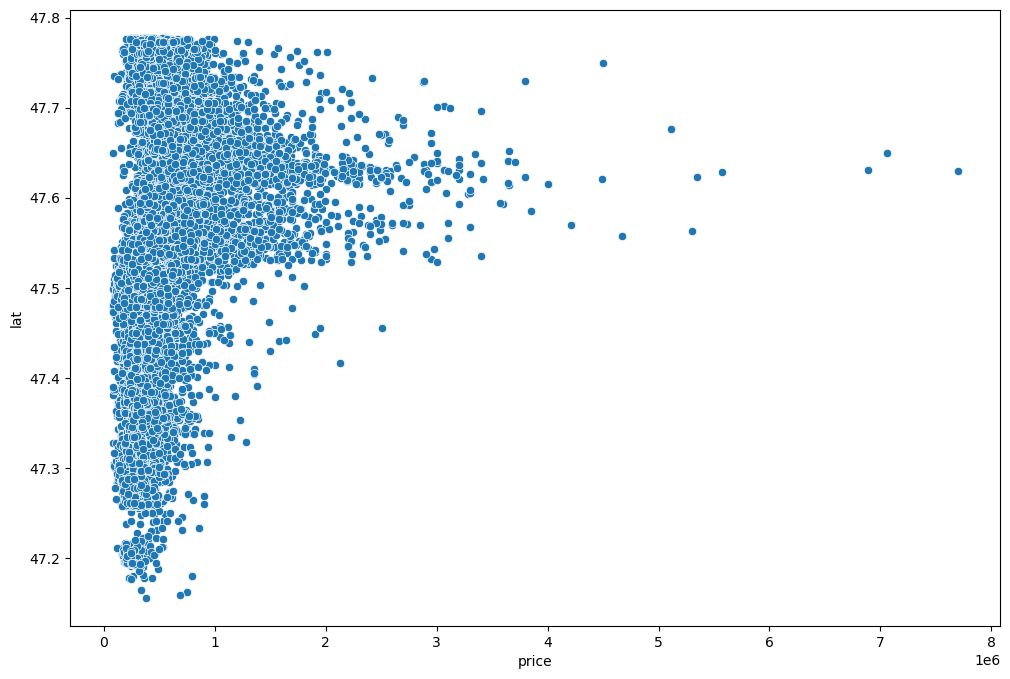

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

# Observations:
#    - Similar to long, there seem to be a price differentiation depending on lat
#    - between lat=47.6&47.7 is where the expensive houses are
#         - maybe ther lies a wealthy neighborhood on that lat. 

We may have found a neighborhood consisting of most of the expensive houses. So what if we graph long vs lat to pinpoint exactly where they are. 

I assume therell be a dense population of expensive houses around `(long, lat) = (-122.2, 47.6)`

<Axes: xlabel='long', ylabel='lat'>

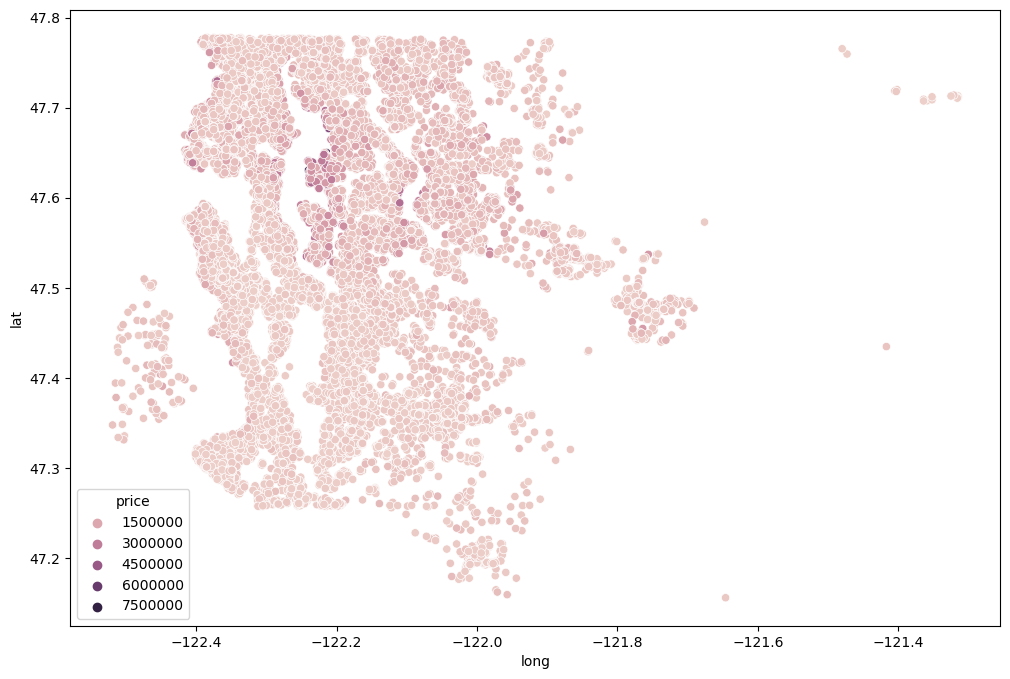

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

Observations: 
   - My initial assumption was correct, there are pockets of neighborhoods in KC with expensive houses
       + Most of these neighborhoods seem to be waterfront property too
   - A byproduct of this plot is that we actuallly created a map of KC
   
The color gradient isnt as informative as i woul dlike, and this may be due to the outliers. So if we can drop the outliers , then this map would become even more helpful.

In [50]:
# FIRST, lets list the most expensive houses
df.sort_values('price',ascending=False).head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [51]:
# One way of cleaning up the outliers is to drop the top 1% of houses ...
len(df)*(0.01)
# ...which ends up being 215 houses being dropped 

215.97

In [52]:
# Creating another df that excludes the top 1%
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

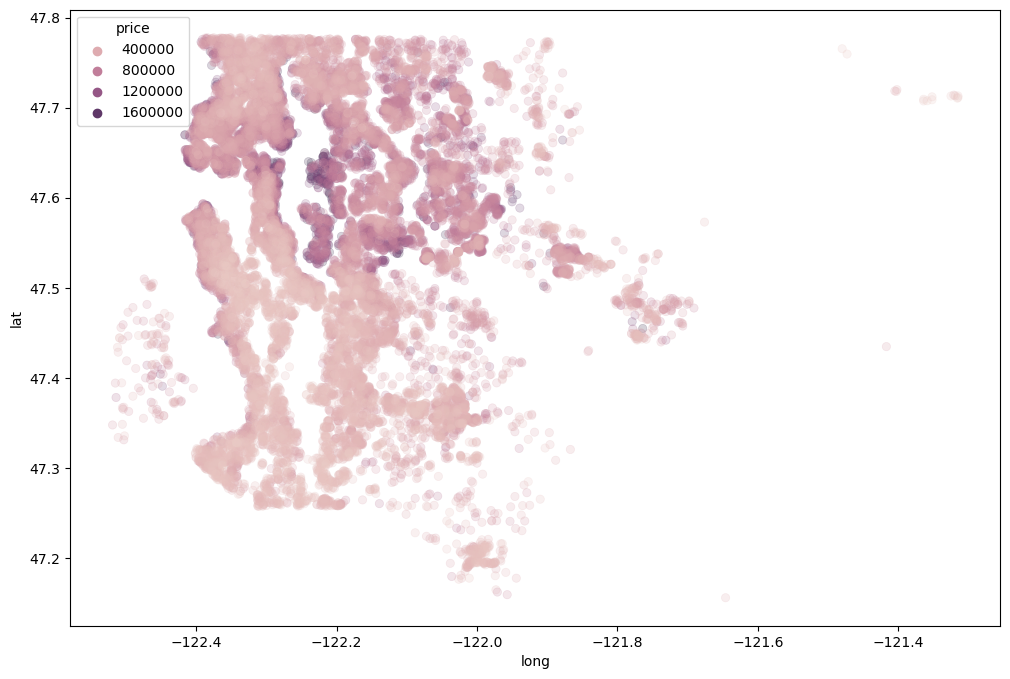

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat',
                data=non_top_1_perc, hue='price',
                edgecolor=None, alpha=0.2)

### ii. Other Features

Previously we meantioned, and this improved map graph further shows it, that most of these epensive houses are waterfront properties. The `.corr()` method states that there is a low correlation between waterfron and price, but lets further dive into that...

<Axes: xlabel='waterfront', ylabel='price'>

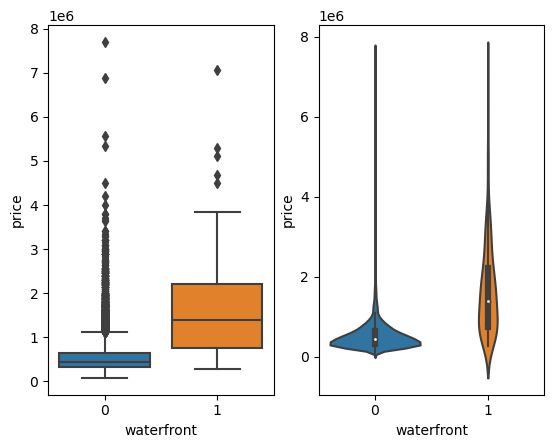

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(df, x='waterfront', y='price', ax=ax1)
sns.violinplot(df, x='waterfront', y='price', ax=ax2)

The correaltion my not be strong, but it does look like, given the distribution of prices, waterfront is more expensive. 

## 1. Working with Feature Data

In [66]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The ID isn't doing much for us atm, and it wont help much when trying to predict prices. So we can drop hte `id` column...

In [67]:
df = df.drop('id',axis=1)

In [68]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### i. Feature Engineering from Date

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

From the `info()` method, the `date` column seems to be a string object. This isnt helpful for us and may complicaate things down the line. So lets convert that to a datetime object. This will make the date column more helpful and give us the ability to separate out the year and month into their own columns (aka __feature engineering__)

In [70]:
# Converting string object into datetime object
df['date'] = pd.to_datetime(df['date'])

In [71]:
# Creating a month column
df['month'] = df['date'].apply(lambda date:date.month)

# Creating a year column
df['year'] = df['date'].apply(lambda date:date.year)

<Axes: xlabel='month', ylabel='price'>

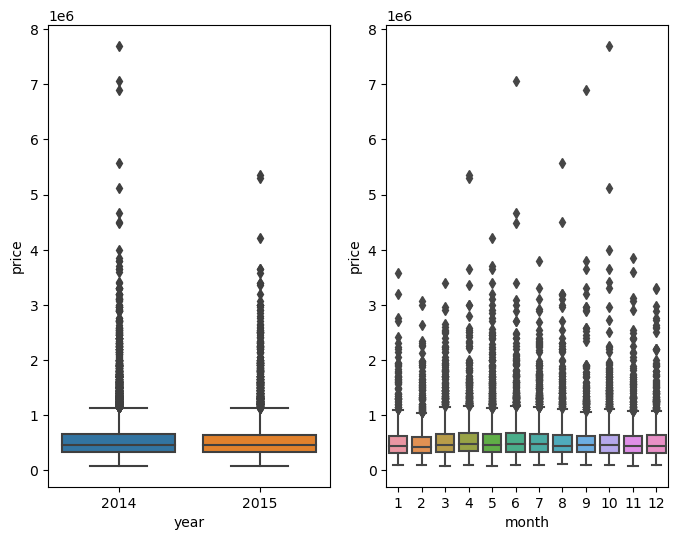

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
sns.boxplot(df, x='year', y='price', ax=ax1)
sns.boxplot(df, x='month', y='price', ax=ax2)

Its hard to extract any info off of these plots, so lets try a different one...

Text(0.5, 1.0, 'Avg. House Price by Year')

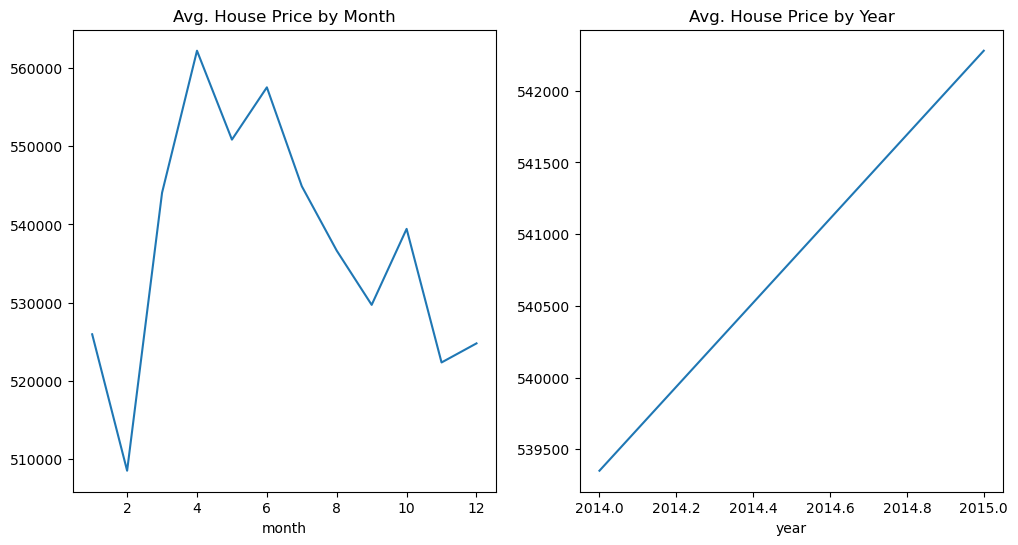

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.groupby('month').mean()['price'].plot(ax=ax1)
ax1.set_title('Avg. House Price by Month')

df.groupby('year').mean()['price'].plot(ax=ax2)
ax2.set_title('Avg. House Price by Year')

With these plots, we do see some variation depending on month and year sold. For example, the avg price by year is linearly increasing (which makes sense as houses become more expensive as time goes, and inflation). But given the range of prices is so small (~$50$k range in the months and <$5$k in the years), it doestn seem to have _that much_ of an effect. But we will still leave it in and see what the model does with that info. 

With the newly created `month` and `year` column, we can _drop_ the `date` column.

Another column we may need to drop is `zipcode`. We could feature engineer this column to get more catigorical info out of it, but given its in numerical form (and the fact that there are 70 unique zipcodes (too mnay cats) and we have a lack of domain knoeledge) it'll just throw off our model.

In [82]:
# Dropping DATE column
df = df.drop('date',axis=1)

# Dropping ZIPCODE column
df = df.drop('zipcode',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


Another catigory we can look at is `yr_renovated`. This tell us the year the house was renovated. If `=0`, then no renovations were made. As seen below, most of the houses (~$20$k) have no renovations. We could feature engineer this column to be a boolean where `0=no_renovations` and `1=renovated`. But for now we will leave this column as is with the logic that the newer the renovations the better (in other words, can be considered a continuous variable).

In [83]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Similar to the renovations, the `sqft_basement` has a a great number of houses with no basements. But this feature can also be considered continuous bc the bigger the basement the more the house is valued as basement space is desirable. 

In [84]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

# II. The Model

### i. Train Test Split

In [85]:
# Separating features from label
X = df.drop('price',axis=1)
y = df['price']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### ii. Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Creating Object from Class
scaler = MinMaxScaler()

In [40]:
# Scaling
#    NOTE: scale AFTER splitting to avoid data leak

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
print(f"Shape of training set: {X_train.shape}")
print("")
print(f"Shape of test set: {X_test.shape}")

Shape of training set: (15117, 19)

Shape of test set: (6480, 19)


Take note of the shape of these datasets. It is good practice to base the number of neurons in each layer on teh size/count of feature data. As we see from above, there are $19$ catigories therefore each layer in the NN should have $19$ neurons. 

## 2. Creating a Model

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

2023-11-09 15:44:43.154622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
# Creating sequential model object from class
model = Sequential()

# units=19 bc there are 19 catigories/features
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Final layer has 1 unit as this is the final output/prediction being price
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam',loss='mse')

## 3. Training the Model

In [93]:
model.fit(x=X_train,
          y=y_train.values, # calling `.values` to convert to an array
          validation_data=(X_test,y_test.values), # help check overfittin gof data; model wont use test data to train
          batch_size=128, # batches needed given the dataset size; usually done in powers of 2; smaller batch=more time
          epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 6ms/step - loss: 384165740544.0000 - val_loss: 317824729088.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 281159892992.0000 - val_loss: 201691447296.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 127809568768.0000 - val_loss: 84664696832.0000
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: 86579625984.0000 - val_loss: 79294619648.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 82010750976.0000 - val_loss: 75042471936.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 78055915520.0000 - val_loss: 71782359040.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 74824515584.0000 - val_loss: 68702326784.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 71866548224.0000 - val_loss: 65866502144.0000
Epoch 9/400
119/119 [======

Epoch 135/400
119/119 [==============================] - 1s 4ms/step - loss: 57089634304.0000 - val_loss: 51247247360.0000
Epoch 136/400
119/119 [==============================] - 0s 4ms/step - loss: 57496305664.0000 - val_loss: 51755339776.0000
Epoch 137/400
119/119 [==============================] - 0s 4ms/step - loss: 57296822272.0000 - val_loss: 51926405120.0000
Epoch 138/400
119/119 [==============================] - 1s 4ms/step - loss: 57085755392.0000 - val_loss: 51164327936.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 56821497856.0000 - val_loss: 52342059008.0000
Epoch 140/400
119/119 [==============================] - 2s 14ms/step - loss: 56813502464.0000 - val_loss: 52813635584.0000
Epoch 141/400
119/119 [==============================] - 0s 4ms/step - loss: 57197654016.0000 - val_loss: 51261194240.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 57207771136.0000 - val_loss: 51561418752.0000
Epoch 143/400
1

119/119 [==============================] - 0s 4ms/step - loss: 49463975936.0000 - val_loss: 44541329408.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 49261989888.0000 - val_loss: 44167651328.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 49127460864.0000 - val_loss: 44932919296.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 49038442496.0000 - val_loss: 44283891712.0000
Epoch 271/400
119/119 [==============================] - 0s 4ms/step - loss: 48957263872.0000 - val_loss: 44475891712.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 49378344960.0000 - val_loss: 44100026368.0000
Epoch 273/400
119/119 [==============================] - 0s 4ms/step - loss: 48944873472.0000 - val_loss: 44728782848.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 49346260992.0000 - val_loss: 44566552576.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 7ms/step - loss: 45984751616.0000 - val_loss: 41141870592.0000
Epoch 400/400
119/119 [==============================] - 1s 5ms/step - loss: 46168379392.0000 - val_loss: 41866883072.0000


Lets explore the modelhistory and see how it did at each epoch (NOTE: given we passed in the model validation, this following will return loss AND value lost (i.e. loss on the validation set)). 

REFRESHER: loss is the penalty of a bad prediction. $0$ is a perfect prediction, the higher the loss the worse it is. 

<Axes: >

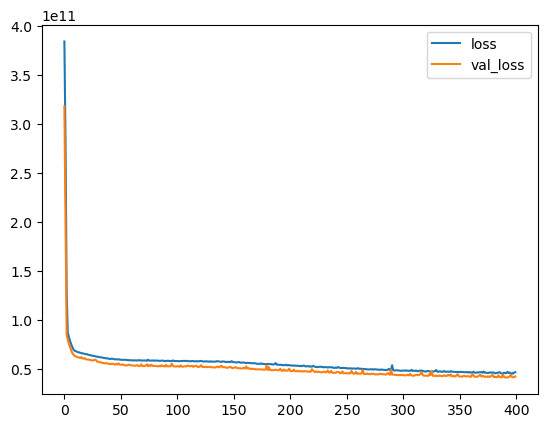

In [94]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# III. Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [96]:
# Getting teh model predictions on test set
predictions = model.predict(X_test)
predictions

203/203 [==============================] - 1s 2ms/step


array([[359053.4 ],
       [510993.34],
       [458847.56],
       ...,
       [363669.78],
       [755295.2 ],
       [751233.6 ]], dtype=float32)

In [99]:
print(f"mean absolute error: {mean_absolute_error(y_test,predictions)}")
print("")
print(f"sqrt(mean square error): {np.sqrt(mean_squared_error(y_test,predictions))}")

mean absolute error: 139532.78088107638

sqrt(mean square error): 204613.9696610045


So... what does this mean...

In [100]:
explained_variance_score(y_test,predictions)

0.6902725695863412

In [101]:
df['price'].mean()

540296.5735055795

In [102]:
df['price'].median()

450000.0

We see that the average error on price is ~$140$k. Is that good or bad?? Well given the average house price is ~$540$k, an error of ~$140$k isnt good, this is a ~$20$% error.

The explained variance score is $.7$ which is okay ($1$ being very good). 

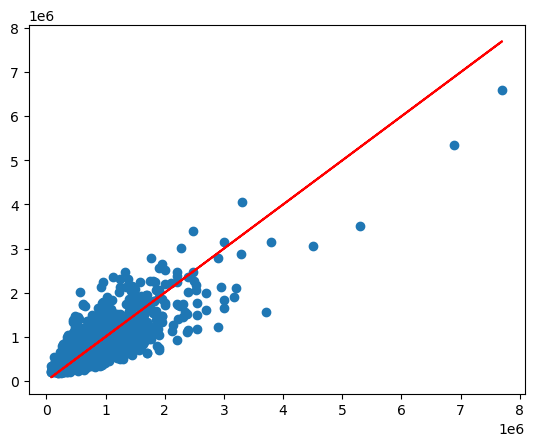

In [103]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [104]:
errors = y_test.values.reshape(6480, 1) - predictions

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


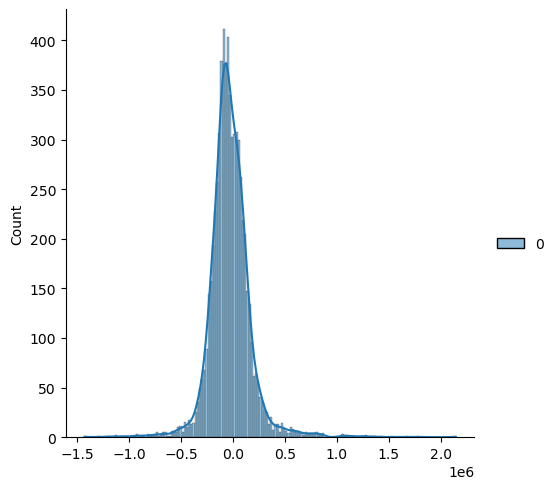

In [106]:
sns.displot(errors, kde=True)

Plotting out the true values vs predicted values with the perfect prediction line (red line), we see that the very expensive outliers is throwing off our model. This is punishing our results as teh model is struggling to predict the prices of the more expensive houses. 

But with that being said, our model does a good job predicting houses between $0$ and $2M$ dollars. And that is what the explained variance score is trying to tell us. The model is doing a good job, but the outliers are throwing off the results. 

What we could do to _improve_ our model is to drop the top $1$% of data to rid the outliers and retrain. Therefore, if we get a house valued at 3M, we wont be able to use this model to predict it (or we can train a separate model on houses in the $1$%).

-------------
## Predicting on a brand new house

In [131]:
# Extract a house from the dataset and drop it
single_house = df.drop('price',axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [132]:
# Convert to an array and SCALE that house
single_house = scaler.fit_transform(single_house.values.reshape(-1, 19))
single_house

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [133]:
model.predict(single_house)

1/1 [==============================] - 0s 189ms/step


array([[674.2071]], dtype=float32)

In [134]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64